# odom

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2          # opencv itself
import depthai as dai
# from collections import deque
# from tqdm import tqdm
import numpy as np  # matrix manipulations
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)

# import yaml

# to play an mpeg4 video, you can do this:
from IPython.display import HTML # need this for embedding a movie in an iframe
from matplotlib import pyplot as plt
# from ipywidgets import Video
from IPython.display import Video
# from helper import *
from oaklib import *

from filters import *

In [3]:
folder = "move2"

In [4]:
Video(f"./{folder}/video.mp4", width=500)

## Video Odometry



## Run Odometry

Now this isn't fast and takes some time. Ideally you should probably code this in C++ for improved speed once you get the algorithm working here.

In [47]:
imgs, imu, caminfo = load_oak(folder)

Oak Camera Save -------------------
 Location: move2
 Images: 2000
 IMU: 12505


In [38]:
k1 = caminfo.left.K
k2 = caminfo.right.K
baseline = 7.5 # cm

print(k1)
print(k2)

[[452.32   0.   330.42]
 [  0.   452.5  255.58]
 [  0.     0.     1.  ]]
[[454.65   0.   314.03]
 [  0.   454.19 255.97]
 [  0.     0.     1.  ]]


In [39]:
# imgs = [x for x in imgs[30:820]]
# plt.imshow(imgs[0][0], cmap="gray");
Video(f"./{folder}/video.mp4", width=500)

In [55]:
pts = playImageSequence(imgs[50:], k1, k2, baseline)

  9%|███▍                                   | 171/1950 [00:00<00:02, 786.33it/s]

inliers: 0.9285714285714286   len(ref2D): 39
inliers: 0.9512195121951219   len(ref2D): 39


 17%|██████▊                                | 341/1950 [00:00<00:02, 771.43it/s]

inliers: 0.8809523809523809   len(ref2D): 37
inliers: 0.926829268292683   len(ref2D): 38


 22%|████████▌                              | 425/1950 [00:00<00:01, 793.15it/s]

inliers: 0.9024390243902439   len(ref2D): 37
inliers: 0.9512195121951219   len(ref2D): 39
inliers: 0.8648648648648649   len(ref2D): 32
inliers: 0.9069767441860465   len(ref2D): 39
inliers: 1.0   len(ref2D): 34
inliers: 0.8478260869565217   len(ref2D): 39


 26%|██████████                             | 505/1950 [00:00<00:02, 510.40it/s]

inliers: 0.975   len(ref2D): 39
inliers: 0.9285714285714286   len(ref2D): 39
inliers: 0.8918918918918919   len(ref2D): 33
inliers: 0.8648648648648649   len(ref2D): 32


 29%|███████████▎                           | 568/1950 [00:01<00:03, 384.61it/s]

inliers: 0.8947368421052632   len(ref2D): 34
inliers: 0.76   len(ref2D): 76
inliers: 0.9512195121951219   len(ref2D): 39
inliers: 0.9393939393939394   len(ref2D): 31


 32%|████████████▎                          | 618/1950 [00:01<00:03, 361.48it/s]

inliers: 0.975   len(ref2D): 39
inliers: 0.9459459459459459   len(ref2D): 35
inliers: 1.0   len(ref2D): 35
inliers: 0.95   len(ref2D): 38
inliers: 0.8571428571428571   len(ref2D): 30
inliers: 0.9285714285714286   len(ref2D): 39


 38%|██████████████▊                        | 741/1950 [00:01<00:02, 446.65it/s]

inliers: 0.9743589743589743   len(ref2D): 38
inliers: 1.0   len(ref2D): 37
inliers: 0.9487179487179487   len(ref2D): 37
inliers: 0.9428571428571428   len(ref2D): 33
inliers: 0.8888888888888888   len(ref2D): 32


 41%|███████████████▉                       | 794/1950 [00:01<00:03, 341.08it/s]

inliers: 0.7272727272727273   len(ref2D): 40
inliers: 0.9024390243902439   len(ref2D): 37
inliers: 0.64   len(ref2D): 32
inliers: 0.8536585365853658   len(ref2D): 35
inliers: 0.9512195121951219   len(ref2D): 39
inliers: 0.7619047619047619   len(ref2D): 32
inliers: 0.9428571428571428   len(ref2D): 33


 41%|████████████████▏                      | 807/1950 [00:02<00:02, 391.00it/s]

inliers: 0.9230769230769231   len(ref2D): 36
inliers: 0.8780487804878049   len(ref2D): 36
inliers: 0.9230769230769231   len(ref2D): 36
inliers: 0.9743589743589743   len(ref2D): 38
inliers: 0.9736842105263158   len(ref2D): 37
inliers: 0.9459459459459459   len(ref2D): 35


error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/calib3d/src/triangulate.cpp:64: error: (-210:Unsupported format or combination of formats) Input parameters must be matrices in function 'icvTriangulatePoints'


length pts: 0


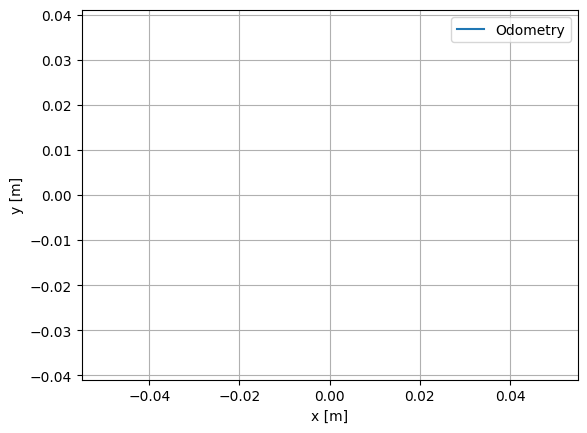

In [50]:
cx = [x[0] / 100 for x in pts]
cy = [x[1] / 100 for x in pts]
plt.plot(cx, cy, label='Odometry')

print(f"length pts: {len(pts)}")

# plt.title('Results for pts[0 - {}]'.format(len(cx)))
plt.grid(True)
plt.xlabel('x [m]')
plt.ylabel('y [m]');
plt.axis('equal');
plt.legend();

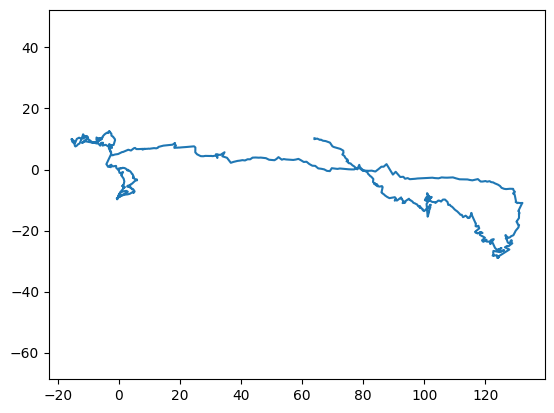

In [32]:
plt.plot(pts[:,0], pts[:,1])
plt.axis('equal');

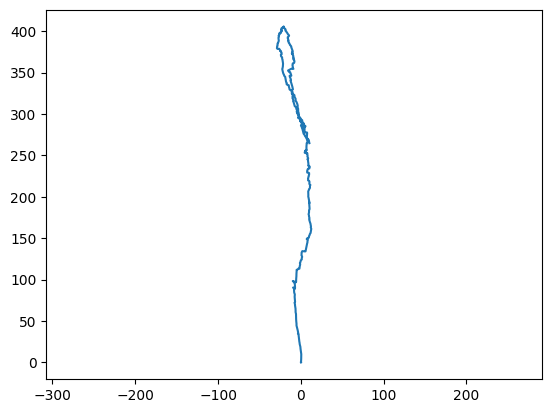

In [33]:
plt.plot(pts[:,1], pts[:,2])
plt.axis('equal');

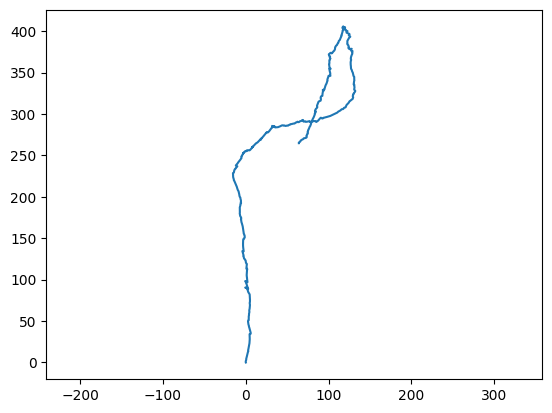

In [34]:
plt.plot(pts[:,0], pts[:,2])
plt.axis('equal');

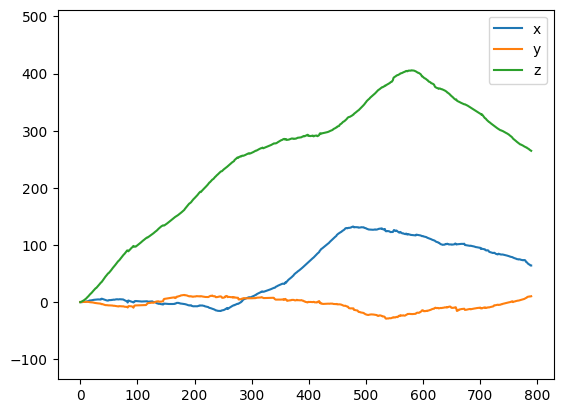

In [36]:
plt.plot(pts[:,0],label="x")
plt.plot(pts[:,1],label="y")
plt.plot(pts[:,2],label="z")
plt.axis('equal')
plt.legend();